# Hypothesis Testing - Lab Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("C:\\Users\\delll\\Desktop\\Python\\DataSets\\lab_tat.xls")
df.head()

,Laboratory_1,Laboratory_2,Laboratory_3,Laboratory_4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [4]:
df.shape
# rows=120 and col=4

(120, 4)

In [5]:
df.columns
# cols represent the laboratory

Index(['Laboratory_1', 'Laboratory_2', 'Laboratory_3', 'Laboratory_4'], dtype='object')

In [6]:
df.dtypes
# All columns are float data type

Laboratory_1    float64
Laboratory_2    float64
Laboratory_3    float64
Laboratory_4    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory_1  120 non-null    float64
 1   Laboratory_2  120 non-null    float64
 2   Laboratory_3  120 non-null    float64
 3   Laboratory_4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [8]:
df.isnull().sum()
# there are no null values

Laboratory_1    0
Laboratory_2    0
Laboratory_3    0
Laboratory_4    0
dtype: int64

In [9]:
df.describe()

,Laboratory_1,Laboratory_2,Laboratory_3,Laboratory_4
count,120.000000,120.000000,120.000000,120.00000
mean,178.257333,178.902917,200.210167,163.68275
std,13.919668,14.957114,15.794801,15.08508
min,140.250000,140.550000,170.580000,124.06000
25%,170.267500,168.025000,190.182500,154.05000
50%,179.055000,178.870000,198.610000,164.42500
75%,187.222500,189.112500,211.197500,172.88250
max,216.390000,217.860000,238.700000,205.18000


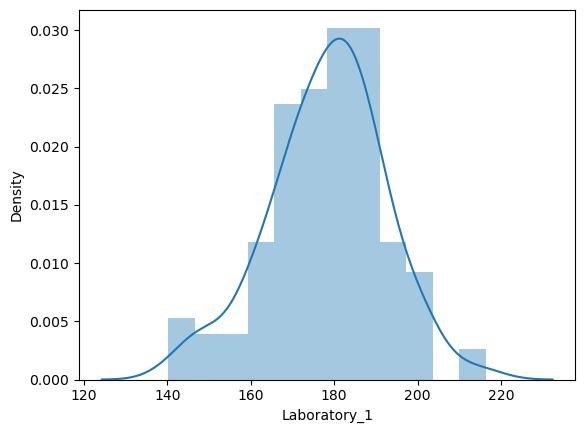

In [10]:
sns.distplot(df["Laboratory_1"])
plt.show()
# Data is slightly left skewed

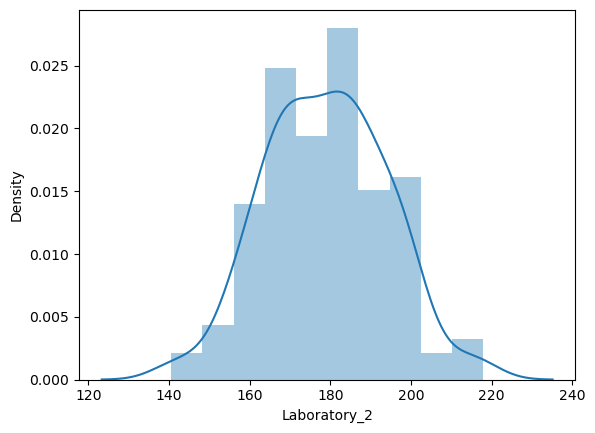

In [11]:
sns.distplot(df["Laboratory_2"])
plt.show()
# Data is slightly normal

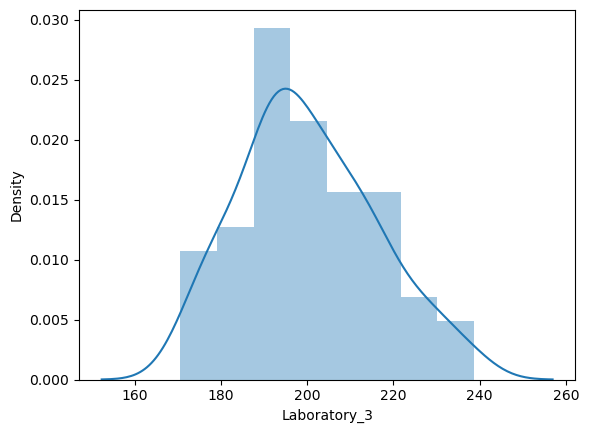

In [12]:
sns.distplot(df["Laboratory_3"])
plt.show()
# Data is normal

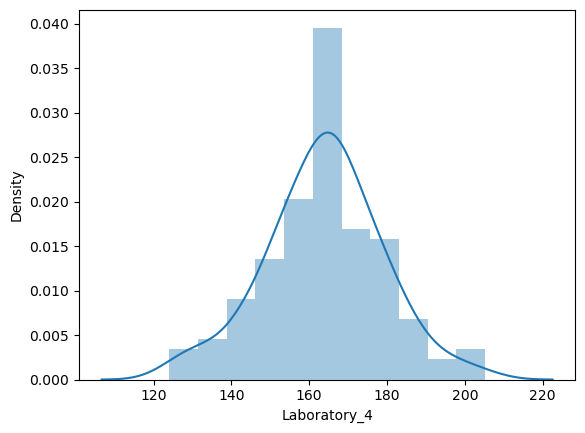

In [13]:
sns.distplot(df["Laboratory_4"])
plt.show()
# Data is normal

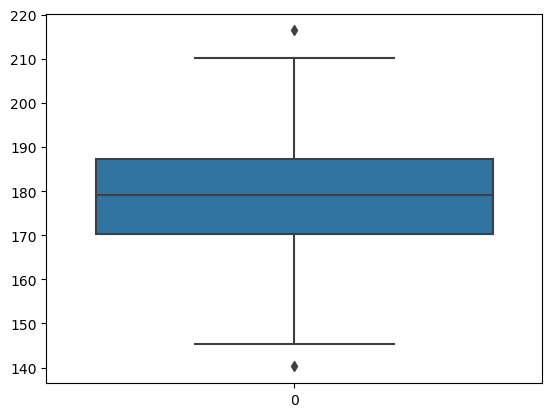

In [14]:
sns.boxplot(df["Laboratory_1"])
plt.show()
# outliers are present

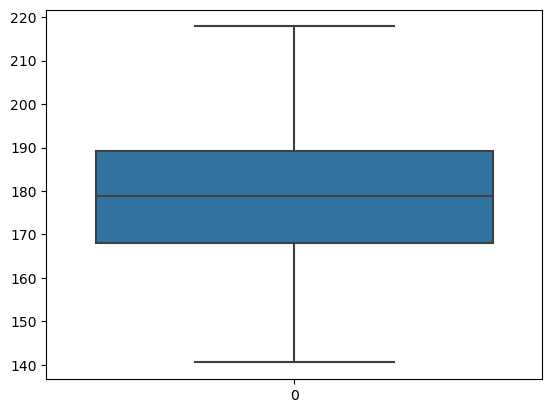

In [15]:
sns.boxplot(df["Laboratory_2"])
plt.show()
# outliers are not present

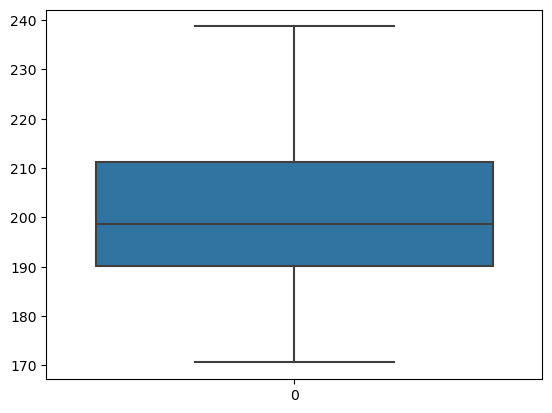

In [16]:
sns.boxplot(df["Laboratory_3"])
plt.show()
# outliers are not present

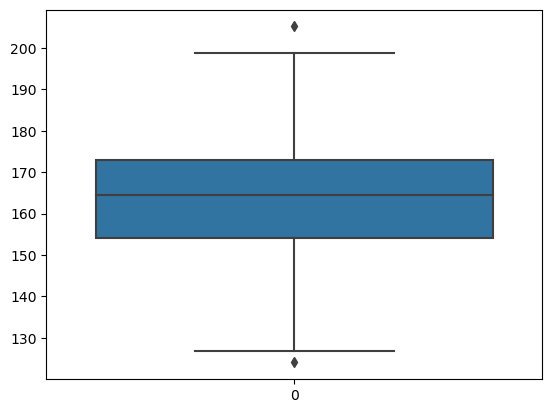

In [17]:
sns.boxplot(df["Laboratory_4"])
plt.show()
# outliers are present

In [18]:
# with the help of winsorizer remove this outlier
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="Laboratory_1",tail="both")
df["Laboratory_1"]=winsor.fit_transform(df[["Laboratory_1"]])

winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="Laboratory_4",tail="both")
df["Laboratory_4"]=winsor.fit_transform(df[["Laboratory_4"]])

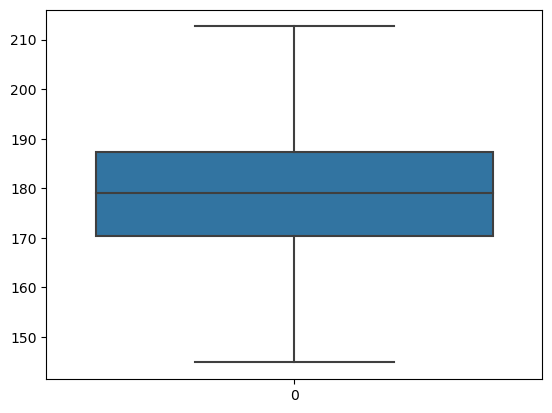

In [19]:
sns.boxplot(df["Laboratory_1"])
plt.show()
# outliers are removed

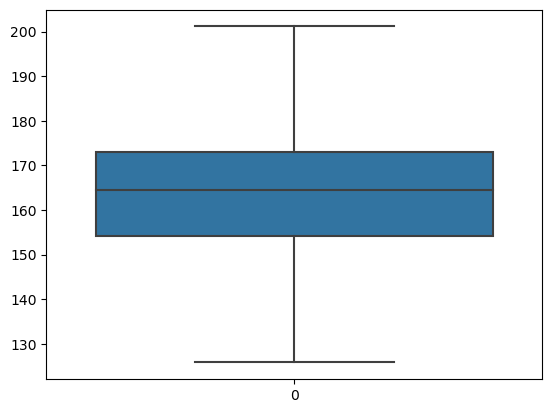

In [20]:
sns.boxplot(df["Laboratory_4"])
plt.show()
# outliers are removed

### Normality test: Shapiro test

In [21]:
# for Laboratory_1
stats.shapiro(df["Laboratory_1"])
# p-val :0.29 > 0.05
# So,data is normally distributed

ShapiroResult(statistic=0.9867110848426819, pvalue=0.2908530533313751)

In [22]:
# for Laboratory_2
stats.shapiro(df["Laboratory_2"])
# p-val :0.86 > 0.05
# So,data is normally distributed

ShapiroResult(statistic=0.9936320185661316, pvalue=0.8637352585792542)

In [23]:
# for Laboratory_3
stats.shapiro(df["Laboratory_3"])
# p-val :0.06 > 0.05
# So,data is normally distributed

ShapiroResult(statistic=0.9796065092086792, pvalue=0.06546738743782043)

In [24]:
# for Laboratory_4
stats.shapiro(df["Laboratory_4"])
# p-val :0.06 > 0.05
# So,data is normally distributed

ShapiroResult(statistic=0.9902291893959045, pvalue=0.5549207329750061)

In [25]:
# All four Laboratory's data is normally distributed

### Variance Test - Levene's test 

In [31]:
stats.levene(df["Laboratory_1"],df["Laboratory_2"],df["Laboratory_3"],df["Laboratory_4"])

0.3368989960176193

In [ ]:
# p-val:0.33 > 0.05
# so, all input samples from population have equal variances

### One Way Anova test

In [33]:
# Perform One Way Anova test because all samples are normally distributed and having equal variance
stats.f_oneway(df["Laboratory_1"],df["Laboratory_2"],df["Laboratory_3"],df["Laboratory_4"])

F_onewayResult(statistic=122.71567857243639, pvalue=7.0039897700517775e-59)

### Conclusion: 